{% include toc title="In This Lesson" icon="file-text" %}


In this lesson, we will learn how to import time series data into `Python`. We will 
test our skills with  dealing with NA values, and ensuring the time comes in as a time data type.
Finally we will plot the data using `matplotlib`.

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* Import a text file in .csv format into Python.
* Plot quantitative time series data using matplotlib 
* Assign missing data values `NaN` in `Python` when the data are imported into Python to ensure that the data plot and can be analyzed correctly.
* Subset data temporally using the `pandas` `.query()` function 

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need

You need `Python 3.x` and `Jupyter notebooks` to complete this tutorial. Also you should have
an `earth-analytics` directory setup on your computer with a `/data`
directory with it.

* [How to Setup R / RStudio](/course-materials/earth-analytics/week-1/setup-r-rstudio/)
* [Setup your working directory](/course-materials/earth-analytics/week-1/setup-working-directory/)
* [Intro to the R & RStudio Interface](/course-materials/earth-analytics/week-1/intro-to-r-and-rstudio)

[<i class="fa fa-download" aria-hidden="true"></i> Download Week 2 Data](https://ndownloader.figshare.com/files/7426738){:data-proofer-ignore='' .btn }

</div>



## Get started with time series data
Let's get started by loading the required python libraries into our Jupyter notebook. 
We will be using 

* numpy # work with arrays and perform quantitative analysis
* pandas # work with data frames
* matplotlib pyplot # plot the data
* os # manage working directory paths
* urllib # import data from a url

In this lesson. 

In [2]:
# load python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib
plt.ion()
# be sure to set your working directory\n",
os.chdir("/Users/lewa8222/Documents/earth-analytics/")

In [3]:
# This is the code that i used to process the data -- can we hide this chunk and potentially not run it but atleast hide it?
precip_boulder = pd.read_csv('data/week2/precipitation/805325-precip-daily-2003-2013.csv', 
                             parse_dates=['DATE'])
# aggregate the data by date
precip_boulder_daily = precip_boulder.groupby('DATE').aggregate(
    {'HPCP': 'sum', 'STATION': 'first', 'ELEVATION': 'first',
     'STATION_NAME': 'first', 'LATITUDE': 'first', 'LONGITUDE': 'first'})
# rename the HPCP column to a human readable column name
precip_boulder_daily = precip_boulder_daily.rename(columns={'HPCP': 'DAILY_PRECIP'})
# add the year column
precip_boulder_daily['YEAR'] = precip_boulder_daily.index.year
# julian is wrong?? - 
precip_boulder_daily['JULIAN'] = precip_boulder_daily.index.date
# is this really jday??
#precip_boulder_daily['JULIAN'].head()
# this is exporting to a csv... i'm not sure if we still need to do this. 
# precip_boulder_daily.to_csv('./data/week_02-hw/precipitation/805325-precip-dailysum-2003-2013.csv')

## Import precipitation data

We will use a precipitation data derived from data accessed through the
National Centers for Environmental Information (formerly
National Climate Data Center) Cooperative Observer Network (COOP)
station 050843 in Boulder, CO. The data time span is: 1 January 2003 through 31
December 2013.

We can use pandas `ps.read_csv()` to import the `.csv` file.

Important: please note that your instructor has added several columns to this data that 
would not usually be there if you downloaded it directly. The added columns include:

* Year and
* Julian day

In [5]:
# import the data
# note why do the data have 
#precip_boulder = pd.read_csv('data/week2/precipitation/805325-precip-dailysum-2003-2013.csv', 
#                             parse_dates=['DATE'])

#precip_boulder.head(6)

,DATE,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
0,2003-01-01,0.00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
1,2003-01-05,999.99,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,5
2,2003-02-01,0.00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
3,2003-02-02,999.99,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,33
4,2003-02-03,0.40,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,34
5,2003-02-05,0.20,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,36


In [35]:
# view data summary statistics
#boulder_daily_precip.describe()

,DAILY_PRECIP,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
count,792.000000,792.0,792.000000,792.000000,792.000000,792.000000
mean,5.297045,1650.5,40.033850,-105.281106,2007.967172,175.541667
std,70.915223,0.0,0.000045,0.000005,3.149287,98.536373
min,0.000000,1650.5,40.033800,-105.281110,2003.000000,1.000000
25%,0.100000,1650.5,40.033800,-105.281110,2005.000000,96.000000
50%,0.100000,1650.5,40.033890,-105.281110,2008.000000,167.000000
75%,0.300000,1650.5,40.033890,-105.281100,2011.000000,255.250000
max,999.990000,1650.5,40.033890,-105.281100,2013.000000,365.000000


In [6]:
# In the previous lesson we downloaded the data using the code below. 
#urllib.request.urlretrieve(url='https://ndownloader.figshare.com/files/7283285', 
#                           filename= 'data/week2/805325-precip-dailysum_2003-2013.csv')


# read the data into python
boulder_daily_precip = pd.read_csv('data/week2/precipitation/805325-precip-dailysum-2003-2013.csv', 
                                   parse_dates=['DATE'])
# view first 5 rows
boulder_daily_precip.head()

,DATE,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
0,2003-01-01,0.00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
1,2003-01-05,999.99,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,5
2,2003-02-01,0.00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
3,2003-02-02,999.99,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,33
4,2003-02-03,0.40,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,34


In [38]:
# view structure of data
boulder_daily_precip.dtypes

DATE            datetime64[ns]
DAILY_PRECIP           float64
STATION                 object
STATION_NAME            object
ELEVATION              float64
LATITUDE               float64
LONGITUDE              float64
YEAR                     int64
JULIAN                   int64
dtype: object

In [39]:
# view summary stats for the precip data - note the max value
boulder_daily_precip['DAILY_PRECIP'].describe()


count    792.000000
mean       5.297045
std       70.915223
min        0.000000
25%        0.100000
50%        0.100000
75%        0.300000
max      999.990000
Name: DAILY_PRECIP, dtype: float64

In [8]:
# view max value
boulder_daily_precip['DAILY_PRECIP'].max()

999.99000000000001

### About the Data

Viewing the structure of these data, we can see that different types of data are included in
this file.

* **STATION** and **STATION_NAME**: Identification of the COOP station.
* **ELEVATION, LATITUDE** and **LONGITUDE**: The spatial location of the station.
* **DATE**: The date when the data were collected in the format: YYYYMMDD. Notice that DATE is
currently class `chr`, meaning the data is interpreted as a character class and
not as a date.
* **DAILY_PRECIP**: The total precipitation in inches. Important: the metadata
notes that the value 999.99 indicates missing data. Also important,
hours with no precipitation are not recorded.
* **YEAR**: the year the data were collected
* **JULIAN**: the JULIAN DAY the data were collected.


Additional information about the data, known as metadata, is available in the
<a href="https://ndownloader.figshare.com/files/7283453">PRECIP_HLY_documentation.pdf</a>.
The metadata tell us that the noData value for these data is 999.99. IMPORTANT:
we have modified these data a bit for ease of teaching and learning. Specifically,
we've aggregated the data to represent daily sum values and added some noData
values to ensure you learn how to clean them!

You can download the original complete data subset with additional documentation
<a href="https://figshare.com/articles/NEON_Remote_Sensing_Boulder_Flood_2013_Teaching_Data_Subset_Lee_Hill_Road/3146284">here. </a>

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional challenge

Using everything you've learned in the previous lessons:

* Import the dataset: `data/week2/precipitation/805325-precip-dailysum-2003-2013.csv`
* Clean the data by assigning noData values to `NA`
* Make sure the date column is a date class
* When you are done, plot it using `ggplot()`.
  * Be sure to include a TITLE, and label the X and Y axes.
  * Change the color of the plotted points

Some notes to help you along:

* Date: be sure to take of the date format when you import the data.
* NoData Values: We know that the no data value = 999.99. We can account for this
when we read in the data. Remember how?

Your final plot should look something like the plot below.
</div>

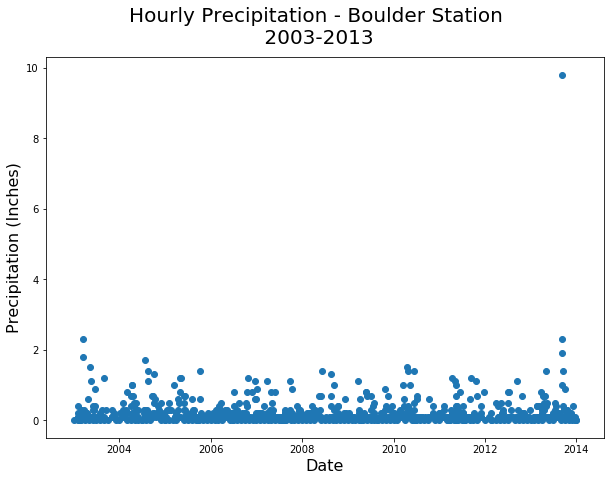

In [33]:
# this code chunk needs to be hidden but show the final plot! this is a challenge exercise 
# so i want to show the plot so they know what the final should look like. 
# import the data specifying the na_value 
boulder_daily_precip = pd.read_csv('data/week2/precipitation/805325-precip-dailysum-2003-2013.csv', 
                                   parse_dates=['DATE'],
                                   na_values=[999.99])

# set figure size
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
# plot the data 
fig, ax = plt.subplots()
# note the use of .values here...
ax.scatter(boulder_daily_precip['DATE'].values, boulder_daily_precip['DAILY_PRECIP'].values)
#ax.set(xlabel="Date", 
#       ylabel="Precipitation (Inches)", 
#       title="");
# can i setup some sort of template to control all of the sizes?
fig.suptitle('Hourly Precipitation - Boulder Station\n 2003-2013', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Precipitation (Inches)', fontsize=16)
# can i make this plot bigger and prettier?? 
# can i get rid of the matplotlib message? 


<i fa fa-star></i>**Data Tip:** in case i want to keep this tip....
{: .notice--success}


<div class="notice--warning" markdown="1">
## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional challenge

Take a close look at the plot.

* What does each point represent?
* Use the `.min()` and `.max()` functions to determine the minimum and maximum precipitation values for the 10 year span.

</div>

## Subset the Data

We can subset the data temporally, to focus in on a shorter time period. Let's 
create a subset of data for the time period around the flood between **15
August to 15 October 2013**. We will use the pandas `.query()` function
to do this.

To subset by a range of dates, we specify the range as follows

`DATE > "2013-08-15" and DATE <= "2013-10-15"`

In the code above we are asking python to only select rows where the DATE value is greater than 2013-08-15 and less than 2013-10-15

In [35]:
# subset the data 
precip_boulder_AugOct = boulder_daily_precip.query('DATE >= "2013-08-15" and DATE <= "2013-10-15"')
# did it work? 
print(precip_boulder_AugOct['DATE'].min())
print(precip_boulder_AugOct['DATE'].max())

2013-08-21 00:00:00
2013-10-11 00:00:00


# is there a pipes equivalent in python?

### Plot subsetted data

Once we've subsetted the data, we can plot the data to focus in on the new time period.



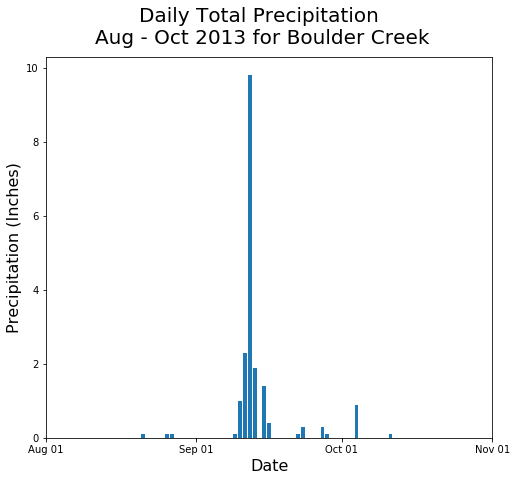

In [55]:
# create figure -- is this using pandas again?
rcParams['figure.figsize'] = 8, 7
fig, ax = plt.subplots()
ax.bar(precip_boulder_AugOct['DATE'].values, precip_boulder_AugOct['DAILY_PRECIP'].values)
#plt.setp(ax.get_xticklabels(), rotation=30)
ax.set(xlim=["2013-08-01", "2013-11-01"]);
# add titles and format as you see fit
fig.suptitle('Daily Total Precipitation \nAug - Oct 2013 for Boulder Creek', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Precipitation (Inches)', fontsize=16)

# looks like there is a date formater that we can use...

# http://matplotlib.org/1.5.3/examples/pylab_examples/date_demo1.html
# maybe make the tick labels larger too
# format the ticks -- this should be included in the previous lesson
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%b %d')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge

Create a subset from the `boulder_daily_precip` data using the same date range in 2012 to compare to the 2013 plot.
Use the ylim() argument to ensure the y axis range is the SAME as the previous
plot - from 0 to 10".

How different was the rainfall in 2012?

HINT: type `?lims` in the console to see how the `xlim` and `ylim` arguments work.


</div>

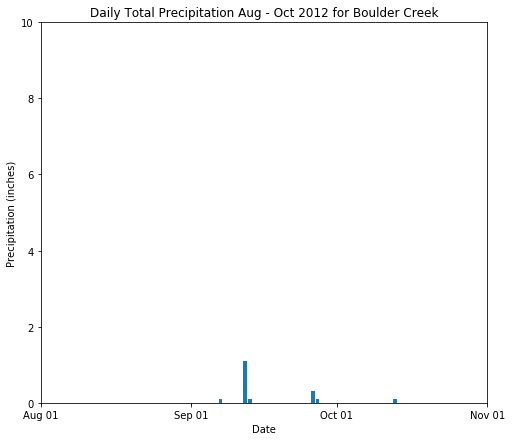

In [63]:
# hide this code from the students but show the output plot
# how can i create a panel of two subsets in matplot lib?
precip_boulder_AugOct_2 = boulder_daily_precip.query('DATE > "2012-08-15" and DATE <= "2012-10-15"')
fig, ax = plt.subplots()
ax.bar(precip_boulder_AugOct_2012['DATE'].values, precip_boulder_AugOct_2012['DAILY_PRECIP'].values)

ax.set(xlabel="Date", ylabel="Precipitation (inches)",
       title="Daily Total Precipitation Aug - Oct 2012 for Boulder Creek",
       xlim=["2012-08-01", "2012-11-01"],
       ylim=[0,10])
# be sure to format the dates properly
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()

# to customize / template

https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib

# want to add universal styles so i don't have to set the font sizes, etc each time. 

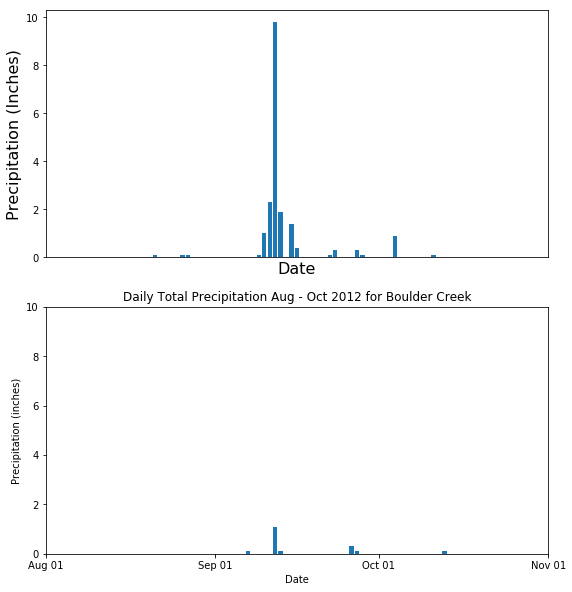

In [73]:
rcParams['figure.figsize'] = 9, 10

plt.figure(1) 
ax=plt.subplot(211)
ax.bar(precip_boulder_AugOct['DATE'].values, precip_boulder_AugOct['DAILY_PRECIP'].values)
#plt.setp(ax.get_xticklabels(), rotation=30)
ax.set(xlim=["2013-08-01", "2013-11-01"]);
# add titles and format  - why isn't the title showing up here??
fig.suptitle('Daily Total Precipitation \nAug - Oct 2013 for Boulder Creek', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Precipitation (Inches)', fontsize=16)

# format the ticks -- this should be included in the previous lesson
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%b %d')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()

ax=plt.subplot(212)
ax.bar(precip_boulder_AugOct_2012['DATE'].values, precip_boulder_AugOct_2012['DAILY_PRECIP'].values)

ax.set(xlabel="Date", ylabel="Precipitation (inches)",
       title="Daily Total Precipitation Aug - Oct 2012 for Boulder Creek",
       xlim=["2012-08-01", "2012-11-01"],
       ylim=[0,10])
# be sure to format the dates properly
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()